In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random 
from IPython.display import HTML
from skimage.draw import *
import imageio as io

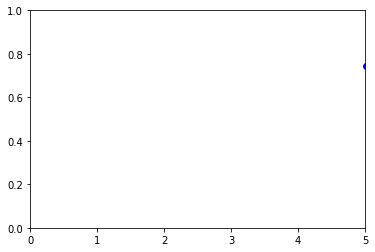

In [2]:
##########Opción1##############
fig, ax = plt.subplots()
ax.set_ylim(0, 1)
p=np.random.rand(20) ####Ingresando p en points, obtendremos particulas aleatorias en el plot 
x=random.randint(0,5) ##Escoge la posicion x de la particula en un rango de 0 a 5 tomando valores enteros 
y=random.random()    ###Escoge la posicion y de la particula en un rango de 0 a 1 tomando valores flotantes 
points, = ax.plot(x,y, 'bo')  ## creo un plot inicial con la informacion de la particula 

def recorrido():
  ax.set_xlim(0,5)
  ax.set_ylim(0,1)
  return points,

def choque_x(x_1):
  if x_1>5 or x_1<0:
    return True

def choque_y(y_1):
  if y_1>1 or y_1<0:
    return True

def puntos(x):
  dt=0.01
  vx=2
  vy=0.2
  mx=choque_x(x)
  my=choque_y(y)

  x_paso=x+vx*dt
  y_paso=y+vy*dt
  if mx==True:
    vx *= -1
    vy *= -1

  if my==True:
    vx *= -1
    vy *= -1

  x_paso=x+vx*dt
  y_paso=y+vy*dt

  points.set_data(x_paso,y_paso) 
  return points,
  

ani=FuncAnimation(fig,puntos,frames=6,init_func=recorrido,blit=True)
HTML(ani.to_jshtml()) 

In [53]:
##########Opción2##############
def recorrido(x,y,box,frames):
  dt=0.01
  vx=200
  vy=100
  i=1
  xd=[]
  yd=[]

  x_paso=x+vx*dt
  y_paso=y+vy*dt

  xd.append(x)
  yd.append(y)
  xd.append(int(x_paso))
  yd.append(int(y_paso))

  while i<frames:
    i+=1
    if x_paso>100 and x_paso<box.shape[0] and y_paso>100 and y_paso<box.shape[0]:
      x_paso=x_paso+vx*dt
      y_paso=y_paso+vy*dt
      xd.append(int(x_paso))
      yd.append(int(y_paso))  
    elif x_paso<100 or x_paso>box.shape[0]:
      x_paso=x_paso+(-1*vx)*dt
      y_paso=y_paso+(-1*vy)*dt
      xd.append(int(x_paso))
      yd.append(int(y_paso))
    elif y_paso<100 or y_paso>box.shape[1]:
      x_paso=x_paso+(-1*vx)*dt
      y_paso=y_paso+(-1*vy)*dt
      xd.append(int(x_paso))
      yd.append(int(y_paso))
  return xd, yd

    
box1=np.zeros((700,700))
box2=np.zeros((800,800))
x1,y1=circle(100,100,20)
img=recorrido(100,100,box1,1000)

gif=[]

for x in range(0,len(img[0])):
  x2,y2=circle(img[0][x],img[1][x],20)
  box2[x2,y2]=255
  gif.append(box2)
 # box2[x2,y2]=0




#with io.get_writer('surface.gif', mode='I', duration=5) as writer:
#    for picture in gif:
#        image = io.imread(picture)
#        writer.append_data(image)
#writer.close()

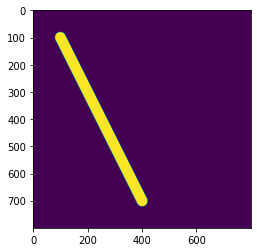

In [54]:
plt.imshow(gif[0])

(3, 0.5007443046869859)


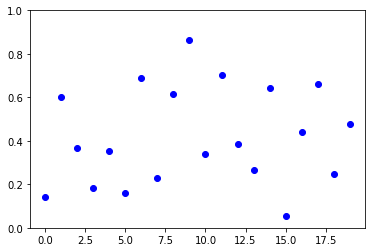

In [15]:
##############BasuraQueVoyUtilizando1#####################

fig, ax = plt.subplots()
ax.set_ylim(0, 1)
p=np.random.rand(20)
x=random.randint(0,5)
y=random.random()
points = ax.plot(p, 'bo')


print((x,y))


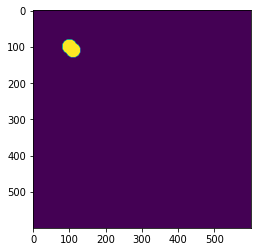

In [16]:
##############BasuraQueVoyUtilizando2#####################
box1=np.zeros((600,600))
x1,y1=circle(100,100,20)
box1[x1,y1]=255
x2,y2=circle(110,110,20)
box1[x2,y2]=255
plt.imshow(box1)

#for x in range(0,len(m[0])):
#  x2,y2=circle(m[0][x],m[1][x],20)
#  box2[x2,y2]=255